In [1]:
import pandas as pd

In [4]:
kijiji_electric_car_listings = pd.read_csv('kijiji_electric_car_listings.csv', sep = ',')
kijiji_electric_car_listings = kijiji_electric_car_listings.drop(columns = ['ad_link', 'time_posted', 'description'])   # drop columns
kijiji_electric_car_listings = kijiji_electric_car_listings.dropna(subset = ['title'])  # drop row if 'title' is null

In [5]:
kijiji_electric_car_listings

,title,price,mileage,transmission,location
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke
...,...,...,...,...,...
4963,2023 Subaru Solterra Technology Package,"$44,967","4,411 km",Automatic,Lethbridge
4964,2023 Ford E-Transit Cargo Van BASE,"$78,105",90 km,Automatic,Dauphin
4965,2019 Tesla Model 3 STANDARD RANGE PLUS,"$25,488","103,000 km",Automatic,Oakville
4966,2024 Volkswagen ID.4 Pro S,"$66,695",0 km,Automatic,Edmonton


In [6]:
# First, split the title column into at least four parts (year, brand, 3rd, and 4th words)
split_title = kijiji_electric_car_listings['title'].str.split(' ', n=4, expand=True)

# Now assign the year, brand, and model (combine 3rd and 4th words for model)
kijiji_electric_car_listings.loc[:, 'year'] = split_title[0]
kijiji_electric_car_listings.loc[:, 'brand'] = split_title[1]
kijiji_electric_car_listings.loc[:, 'model'] = split_title[[2, 3]].fillna('').agg(' '.join, axis=1)

# Display the updated DataFrame
kijiji_electric_car_listings


,title,price,mileage,transmission,location,year,brand,model
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford,2017,Kia,Soul EV
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London,2021,Porsche,Taycan Tech|Premium|Off-Road
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph,2023,Chevrolet,Bolt EUV
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park,2024,Hyundai,IONIQ 5
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke,2024,Audi,Q4 e-tron
...,...,...,...,...,...,...,...,...
4963,2023 Subaru Solterra Technology Package,"$44,967","4,411 km",Automatic,Lethbridge,2023,Subaru,Solterra Technology
4964,2023 Ford E-Transit Cargo Van BASE,"$78,105",90 km,Automatic,Dauphin,2023,Ford,E-Transit Cargo
4965,2019 Tesla Model 3 STANDARD RANGE PLUS,"$25,488","103,000 km",Automatic,Oakville,2019,Tesla,Model 3
4966,2024 Volkswagen ID.4 Pro S,"$66,695",0 km,Automatic,Edmonton,2024,Volkswagen,ID.4 Pro


In [7]:
# First, remove non-numeric characters like '$' and ','
kijiji_electric_car_listings['price_clean'] = kijiji_electric_car_listings['price'].replace({'\$': '', ',': ''}, regex=True)

# Now, convert valid numeric entries to floats, and invalid entries (like 'Please Contact') will become NaN
kijiji_electric_car_listings['price_clean'] = pd.to_numeric(kijiji_electric_car_listings['price_clean'], errors='coerce')

# Display the updated DataFrame
kijiji_electric_car_listings


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_74567/2706994635.py:2: SyntaxWarning: invalid escape sequence '\$'
  kijiji_electric_car_listings['price_clean'] = kijiji_electric_car_listings['price'].replace({'\$': '', ',': ''}, regex=True)


,title,price,mileage,transmission,location,year,brand,model,price_clean
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford,2017,Kia,Soul EV,16499.0
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London,2021,Porsche,Taycan Tech|Premium|Off-Road,109998.0
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph,2023,Chevrolet,Bolt EUV,32988.0
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park,2024,Hyundai,IONIQ 5,NaN
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke,2024,Audi,Q4 e-tron,61977.0
...,...,...,...,...,...,...,...,...,...
4963,2023 Subaru Solterra Technology Package,"$44,967","4,411 km",Automatic,Lethbridge,2023,Subaru,Solterra Technology,44967.0
4964,2023 Ford E-Transit Cargo Van BASE,"$78,105",90 km,Automatic,Dauphin,2023,Ford,E-Transit Cargo,78105.0
4965,2019 Tesla Model 3 STANDARD RANGE PLUS,"$25,488","103,000 km",Automatic,Oakville,2019,Tesla,Model 3,25488.0
4966,2024 Volkswagen ID.4 Pro S,"$66,695",0 km,Automatic,Edmonton,2024,Volkswagen,ID.4 Pro,66695.0


In [8]:
# Remove the 'km' and commas, then convert to float
kijiji_electric_car_listings['mileage_clean'] = kijiji_electric_car_listings['mileage'].replace({'km': '', ',': ''}, regex=True).astype(float)

# Display the updated DataFrame
kijiji_electric_car_listings


,title,price,mileage,transmission,location,year,brand,model,price_clean,mileage_clean
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford,2017,Kia,Soul EV,16499.0,13359.0
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London,2021,Porsche,Taycan Tech|Premium|Off-Road,109998.0,19970.0
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph,2023,Chevrolet,Bolt EUV,32988.0,20913.0
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park,2024,Hyundai,IONIQ 5,NaN,12.0
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke,2024,Audi,Q4 e-tron,61977.0,17200.0
...,...,...,...,...,...,...,...,...,...,...
4963,2023 Subaru Solterra Technology Package,"$44,967","4,411 km",Automatic,Lethbridge,2023,Subaru,Solterra Technology,44967.0,4411.0
4964,2023 Ford E-Transit Cargo Van BASE,"$78,105",90 km,Automatic,Dauphin,2023,Ford,E-Transit Cargo,78105.0,90.0
4965,2019 Tesla Model 3 STANDARD RANGE PLUS,"$25,488","103,000 km",Automatic,Oakville,2019,Tesla,Model 3,25488.0,103000.0
4966,2024 Volkswagen ID.4 Pro S,"$66,695",0 km,Automatic,Edmonton,2024,Volkswagen,ID.4 Pro,66695.0,0.0


In [13]:
kijiji_electric_car_listings.to_csv("cleaned_kijiji_electric_car_listings.csv", index=False)

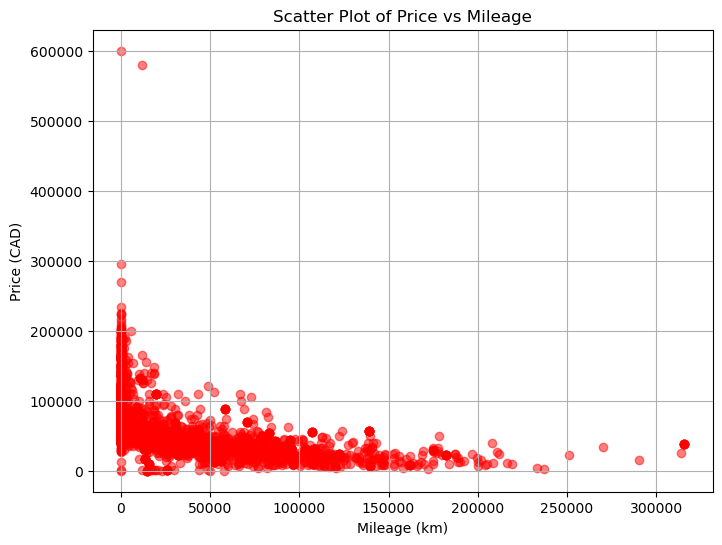

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot for price vs mileage
plt.figure(figsize=(8, 6))
plt.scatter(kijiji_electric_car_listings['mileage_clean'], kijiji_electric_car_listings['price_clean'], color='red', alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CAD)')

# Show the plot
plt.grid(True)
plt.show()


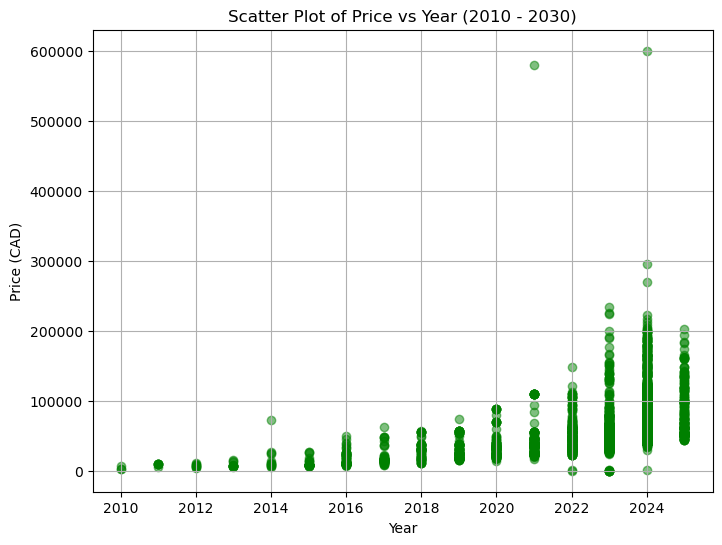

In [10]:
# First, ensure the 'year' column contains only valid numeric data
kijiji_electric_car_listings['year_clean'] = pd.to_numeric(kijiji_electric_car_listings['year'], errors='coerce')

# Filter the DataFrame to include only rows where the year is between 2000 and 2026
filtered_listings = kijiji_electric_car_listings[(kijiji_electric_car_listings['year_clean'] >= 2010) & (kijiji_electric_car_listings['year_clean'] <= 2030)]

# Create the scatter plot using the filtered DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(filtered_listings['year_clean'], filtered_listings['price_clean'], color='green', alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Price vs Year (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Price (CAD)')

# Show the plot
plt.grid(True)
plt.show()


In [11]:
info = kijiji_electric_car_listings.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 0 to 4967
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4860 non-null   object 
 1   price          4860 non-null   object 
 2   mileage        4860 non-null   object 
 3   transmission   4531 non-null   object 
 4   location       4860 non-null   object 
 5   year           4860 non-null   object 
 6   brand          4858 non-null   object 
 7   model          4860 non-null   object 
 8   price_clean    4672 non-null   float64
 9   mileage_clean  4860 non-null   float64
 10  year_clean     4624 non-null   float64
dtypes: float64(3), object(8)
memory usage: 455.6+ KB
None


In [12]:
summary = kijiji_electric_car_listings.describe()
print(summary)


         price_clean  mileage_clean   year_clean
count    4672.000000    4860.000000  4624.000000
mean    63644.089897   22138.620165  2021.983348
std     36183.470582   41121.067901    41.734396
min         1.000000       0.000000     9.000000
25%     42889.000000      12.000000  2023.000000
50%     59561.500000      90.000000  2024.000000
75%     75907.500000   27764.250000  2024.000000
max    599995.000000  315650.000000  2025.000000
